# Bean Classification Project Proposal 

In [2]:
#run this cell before continuing

library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 16)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

# Introduction

This dataset is based on 13611 images of 7 types of individual dry beans with similar features. Each image was analyzed for 16 features of the bean (4 "shape factors", 12 structural/geometric features) (Kolku & Ozkan, 2020).


The question we will be answering is whether we can determine the bean type in an image based on the measured physical measurements of the bean. We will be using K-nearest neighbors classification to predict "Class" using the predictors "Area", and "roundness".

Our variable of intetrest:
- **Area**:The area of a bean zone and the number of pixels within its boundaries.
- **Roundess**: Calculated with the following formula: (4piA)/(P^2)\
Note: P in the roundness area is the Perimeter variable in the dataset. The Perimeter variable is definied as Bean circumference is defined as the length of its border (Kolku & Ozkan, 2020).

# Preliminary exploratory data analysis

In [3]:
beanurl<-"https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"
temp <- tempfile()
download.file(beanurl,temp)
beanzip <- unzip(temp, "DryBeanDataset/Dry_Bean_Dataset.xlsx")
bean <- read_excel(beanzip)
bean

Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
30008,645.884,210.5580,182.5165,1.153638,0.4986160,30724,195.4671,0.7826813,0.9766957,0.9039364,0.9283288,0.007016729,0.003214562,0.8617944,0.9941988,SEKER
30140,620.134,201.8479,190.2793,1.060798,0.3336797,30417,195.8965,0.7730980,0.9908933,0.9848771,0.9705155,0.006697010,0.003664972,0.9419004,0.9991661,SEKER
30279,634.927,212.5606,181.5102,1.171067,0.5204007,30600,196.3477,0.7756885,0.9895098,0.9438518,0.9237260,0.007020065,0.003152779,0.8532696,0.9992358,SEKER
30477,670.033,211.0502,184.0391,1.146768,0.4894779,30970,196.9886,0.7624015,0.9840814,0.8530799,0.9333736,0.006924899,0.003242016,0.8711862,0.9990487,SEKER
30519,629.727,212.9968,182.7372,1.165591,0.5137596,30847,197.1243,0.7706818,0.9893669,0.9671092,0.9254804,0.006979152,0.003158285,0.8565140,0.9983446,SEKER
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [4]:
class_dist <- bean |>
                group_by(Class)|>
                summarize(n = n()) |>
                mutate(percentage_dist = 100*n/nrow(bean))
class_dist

Class,n,percentage_dist
<chr>,<int>,<dbl>
BARBUNYA,1322,9.712732
BOMBAY,522,3.835133
CALI,1630,11.975608
DERMASON,3546,26.052458
HOROZ,1928,14.165014
SEKER,2027,14.892366
SIRA,2636,19.366689


In [5]:
##Creating training and testing dataset

set.seed(2022)
bean_split <- initial_split(bean, prop = 0.75, strata = Class)
bean_train <- training(bean_split)
bean_test <- testing(bean_split)

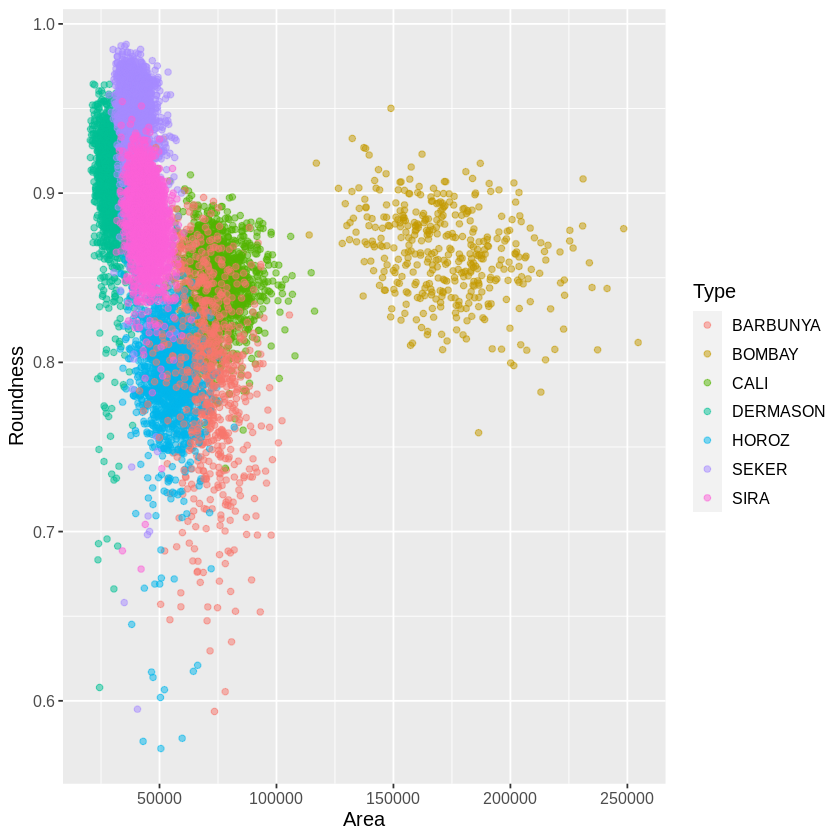

In [6]:
#Graphing the training dataset

area_ecc <- bean_train |>
  ggplot(aes(x = Area, y = roundness, color = Class)) +
  geom_point(alpha = 0.5) +
  labs(x = "Area", 
       y = "Roundness",
       color = "Type") +
  theme(text = element_text(size = 12))
area_ecc

### Roundness versus Area ###
- From this point plot, we can see that there is no relationship between the area and roundness of the bean. However, classify each data points into each type of beans based on the color, we can see that there is some distinction between different type of beans based on its area size and roundness. Especially the Bombay beans, even though it has less number of datapoints in the training dataset, its area and roundness value distinct the the bean from the other type. Meanwhile the other type of beans's area and roundess despite overlapping each other, there are some slight distinctions between them, based on the cluster of the same color. So when we use this for predictions, if the test data points is within the mean value of area and roundness of the each type, our model can possibly classify the type easier than the ones that are on the edge of the cluster

In [7]:
#Summarize training dataset
bean_class_dist <- bean_train |>
                group_by(Class)|>
                summarize(count = n()) |>
                mutate(percentage_dist = 100*count/nrow(bean_train))
bean_class_dist

Class,count,percentage_dist
<chr>,<int>,<dbl>
BARBUNYA,996,9.758009
BOMBAY,404,3.958068
CALI,1226,12.011365
DERMASON,2656,26.021358
HOROZ,1431,14.019790
SEKER,1521,14.901538
SIRA,1973,19.329872


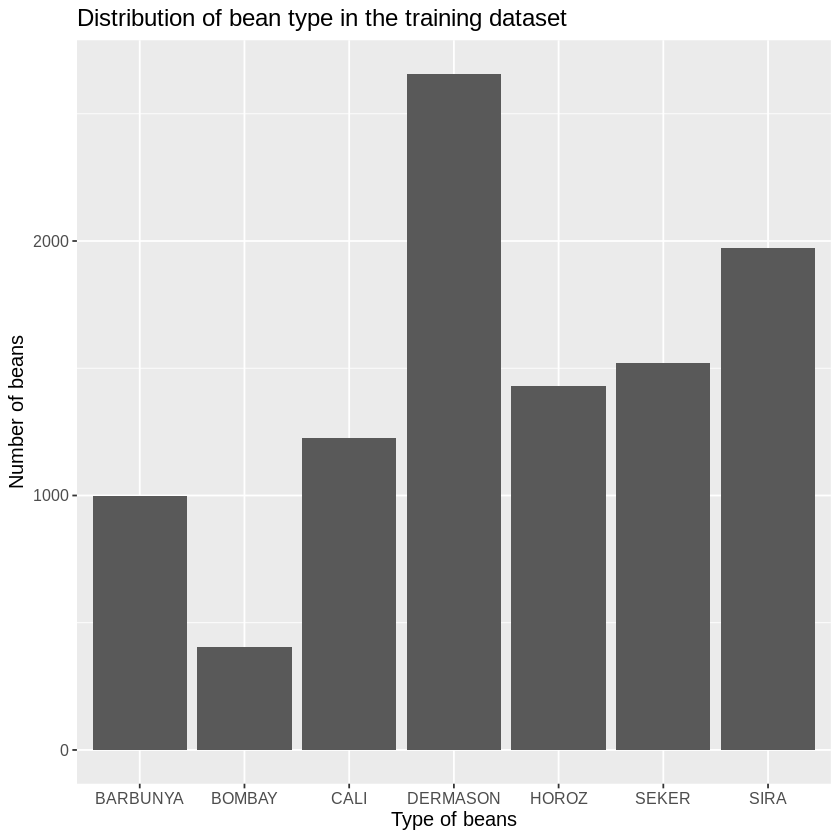

In [16]:
bean_class_dist_plot <- bean_class_dist |>
                        ggplot(aes(x=Class, y = count))+
                        geom_bar(stat = "identity")+
                        labs(x= "Type of beans",
                             y = "Number of beans")+
                        ggtitle("Distribution of bean type in the training dataset")+
                        theme(text = element_text(size = 12))
bean_class_dist_plot

### Bar Chart Observation ###
- From the bar chart, we can see that out of all six type of beans, the Dermason bean class holds tha majority of number of bean classes that we have, and the Bombay bean type has the lowest numebr of data points in our training dataset. With this disparity of number between the Dermason class, and Bombay bean class agains the otehr bean types, we should take this into consideration when we are using KKNN classification method to predict the type of bean. It is more likely that the computer can predict the Dermason more correctly than the Bombay. In addition, it will be likely that the Dermason will also be a majority of bean appear in the testing batch, so with more accuracy on the Dermason bean batch, it is likely that the prediction comes out higher than it actually is. 

In [9]:
#Statistical Distribution of predictor based on class
features_dist_by_class <- bean_train |>
                group_by(Class)|>
                summarize(max_area = max(Area),
                          min_area = min(Area),
                          max_roundness = max(roundness),
                          min_roundness = min(roundness))
features_dist_by_class

Class,max_area,min_area,max_roundness,min_roundness
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
BARBUNYA,105542,41487,0.9319586,0.5937083
BOMBAY,254616,114004,0.9501045,0.7584168
CALI,116272,45504,0.9200291,0.7374636
DERMASON,42147,20420,0.9666028,0.6078674
HOROZ,81929,33263,0.9190136,0.5718009
SEKER,59385,28395,0.9879197,0.5950484
SIRA,63612,31519,0.9541042,0.6778369


In [10]:
#Statistical Distribution in Features of varieties of dry bean
features_dist <- bean_train |>
            pivot_longer(cols= Area:ShapeFactor4,
                         names_to = "Features",
                         values_to = "values") |>
            group_by(Features) |>
            summarize(Mean = mean(values),
                      Min = min(values),
                      Max = max(values),
                     Std_Deviation = sd(values))
features_dist

Features,Mean,Min,Max,Std_Deviation
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Area,5.316321e+04,2.042000e+04,2.546160e+05,2.959663e+04
AspectRation,1.582878e+00,1.036423e+00,2.430306e+00,2.465159e-01
Compactness,7.999492e-01,6.405768e-01,9.816111e-01,6.161852e-02
ConvexArea,5.388229e+04,2.068400e+04,2.632610e+05,3.004866e+04
Eccentricity,7.508417e-01,2.627744e-01,9.114230e-01,9.179368e-02
EquivDiameter,2.532493e+02,1.612438e+02,5.693744e+02,5.962082e+01
Extent,7.502093e-01,5.666693e-01,8.661946e-01,4.908532e-02
MajorAxisLength,3.203253e+02,1.836012e+02,7.388602e+02,8.608262e+01
MinorAxisLength,2.024413e+02,1.225127e+02,4.601985e+02,4.538716e+01


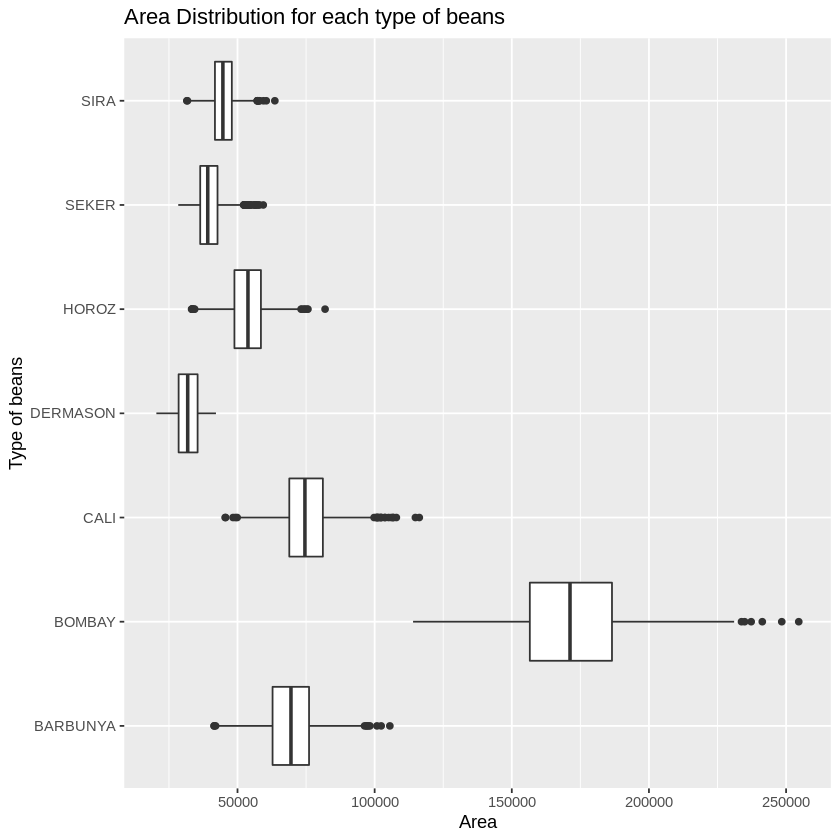

In [12]:
#Graphing area distribution for each type of bean
area_box_plot <- bean_train |>
                ggplot(aes(x = Class, y = Area))+
                geom_boxplot()+
                xlab("Type of beans")+
                ylab("Area")+
                ggtitle("Area Distribution for each type of beans")+
                coord_flip()
area_box_plot

### Area distribution for each type of beans box plot ###
- From the boxplot visualizing the distribution of the area for each type of bean, we can see that the Inter Quartile Range (IQR), or 50% of the central data (Krzywinski & Naom, 2014, pp. 119+) has little overlap over each other. However, we can see that based on the box plot of each type, the area distribution of each type of data is skew slightly to the right, which indicate, most area value of each bean type is on the lower end of the box plot (Krzywinski & Naom, 2014, pp. 119+). In addition, we can see that the Bombay bean type area distribution is quite distinct from other box plot. While other bean type box plot area distribution ranging from around 50000 to around 100000, the Bomabay dataset is much higher than that. Finally, we can see that each type has an outlier in its upper bound, which align with the point plot that we see at the beginning

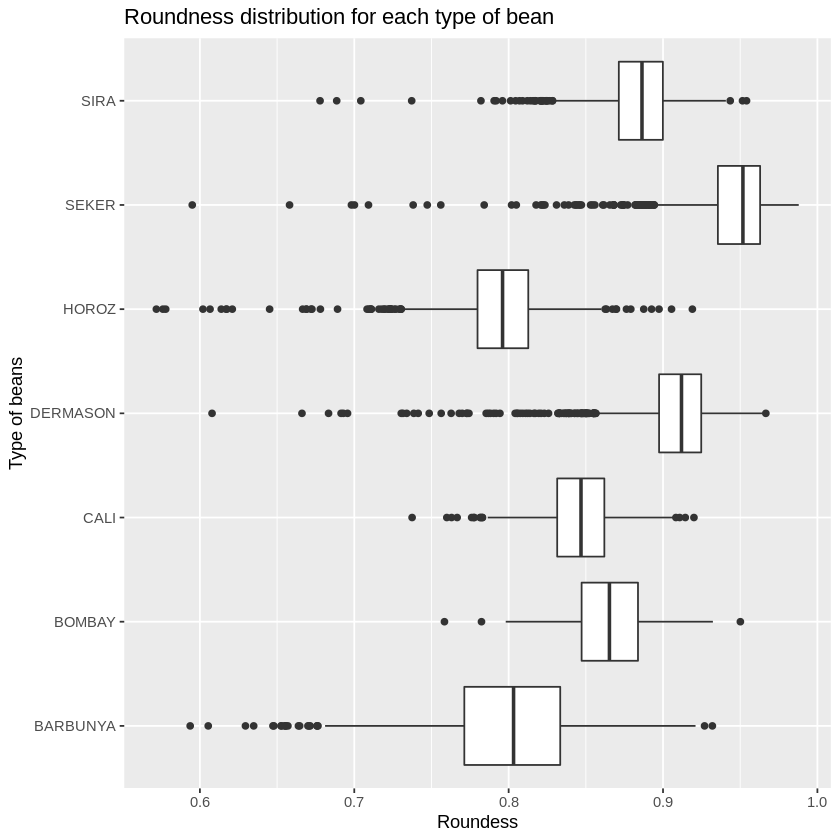

In [17]:
#Graphing box plot showing roundness distribution for each type of box plot
roundness_box_plot <- bean_train |>
                ggplot(aes(x = Class, y = roundness))+
                geom_boxplot()+
                xlab("Type of beans")+
                ylab("Roundess")+
                ggtitle("Roundness distribution for each type of bean")+
                coord_flip()
roundness_box_plot

### Roundness distribution for each type of bean ###
- From the boxplot of roundness distribution of each type of bean, we can see that the Interquartile range of each type has little to no overlap over each other (Krzywinski & Naom, 2014, pp. 119+). However, most type of beans has multiple outliers that there are multiple outliers in the lower end of the each type, which is similar to the point plot that we see in the beginning. The type of beans that has more outliers are Seker, Horoz, and Dermason type, which is interesting to note, since they can possibly affect our prediction model. Finally, in comparison to other type roundness distribution, the Barbunya bean type has the largest roundness value range than any other type, a similar observation can also be seen in the p

# Methods
1. Data cleaning
- We will load the raw data set into R and cleaning it. 

2. Visualize Data
- Next, we will create visualizations such as scatterplots to identify any trends or potential outliers in the data.

3. Select Variables
- We will then select two variables: roundness and area as they are the most relevant variables for predicting the type of bean based on the physical dimensions (height and weight). 

4. Model the Data
- We will create a k-nearest neighbors (KNN) classification model using roundness and area as predictors. First, we will split the data into a training set and a testing set. Next, we will perform cross-validation by fitting the KNN model with different values of k on the training set. The testing set (has untrained data) will be used to evaluate the generalizability of the model and avoid bias. By using unseen data, we can assess the model's ability to classify new observations accurately. Finally, the testing data will be used to assess the accuracy of the KNN model for each k value, and the k value with the highest accuracy will be chosen as the optimal parameter for the model.racy as the optimal parameter for our model.

5. Visualization
- We'll make a scatterplot with colored data points for each bean type to visualize the model's performance in separating them based on the two predictors. Additionally, we'll create a confusion matrix to display the model's correct and incorrect predictions for each bean type.


# Expected outcomes and significance

What do we expect to find?
- With the help of a classification model, we expect to find a well-performing model that can predict the type of beans based on their roundness and area with high accuracy. On the visualization, we also expect to see a cluster for different types of bean in various colors.  

What impact could such findings have?
- This classification model can impact the food and agriculture industry. An automated system can be created to classifiy the type of bean based on their physical appearance. This is espcially useful when food and agriculture companies collect different types of beans together, dry them, and want to package them based on different types. The model we built can help to streamline the service, gain quality control and reduce the time for people to manually separate the beans. 

What future questions could this lead to?
- Can other variables such as major axis length or the perimeter be good predictors of the type? And are they better predictors than roundness and area?
- Can the classification model be used for different types of crops such as rice? 

## References ##:
- Krzywinski, Martin, and Naomi Altman. "Visualizing samples with box plots: use box plots to illustrate the spread and differences of samples." Nature Methods, vol. 11, no. 2, Feb. 2014, pp. 119+. Gale OneFile: Health and Medicine, link.gale.com/apps/doc/A361242515/HRCA?u=ubcolumbia&sid=bookmark-HRCA&xid=0db0fe06. Accessed 11 Mar. 2023.

- Koklu, M., & Ozkan, I. A. (2020). Multiclass classification of dry beans using computer vision and machine learning techniques. Computers and Electronics in Agriculture, 174, 105507. https://doi.org/10.1016/j.compag.2020.105507